# Machine Learning for Data Science 
# Tree-Based Methods
## Rajnandini Thopte 

***

## Important Note: 
### I have used one late day to submit this homework. Due: 3rd Nov '23 , Submitted: 4th Nov'23

### Github did not allow me to upload a file larger than 25MB so I have uploaded my data file as a zip file in the data folder, and processed the data accordingly in my code below to ensure a smooth run of my notebook. I first unzip the file and then extract it to a folder called 'HW6_data' that contains the data folder with all the files.  

## 1. Tree-Based Methods

#### (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pprint
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import LeaveOneOut, GridSearchCV,StratifiedKFold ,KFold
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, auc, accuracy_score
!python -m pip install imblearn
from imblearn.over_sampling import SMOTE
!pip install --upgrade imbalanced-learn
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score

In [13]:
import zipfile
import pandas as pd

# Path to your data.zip file
zip_file_path = '../data/data.zip'  
# Directory where you want to extract the contents
extraction_path = '../data/HW6_data'

# Extract the contents of the zip file to the extraction path
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Define file paths for your data
APS_failure_training_file = '../data/HW6_data/data/aps_failure_training_set.csv'
APS_failure_testing_file = '../data/HW6_data/data/aps_failure_test_set.csv'
APS_failure_description_file = '../data/HW6_data/data/aps_failure_description.txt'

# Read the CSV files into DataFrames
APS_train_df = pd.read_csv(APS_failure_training_file, skiprows=20, na_values='na')
APS_test_df = pd.read_csv(APS_failure_testing_file, skiprows=20, na_values='na')

# Print data shapes
print("Training Data Shape:", APS_train_df.shape)
print("Testing Data Shape:", APS_test_df.shape)


Training Data Shape: (60000, 171)
Testing Data Shape: (16000, 171)


In [14]:
APS_train_df

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2       neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [15]:
APS_test_df

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
0         0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
1         0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
2         0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
3         0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
4         0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
15995     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
15996     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
15997     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
15998     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
15999     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0          88.0       0.0      0.0     0.0     0.0  
1         462.0       0.0      0.0     0.0     0.0  
2      153680.0     516.0      0.0     0.0     0.0  
3      210074.0  281662.0   3232.0     0.0     0.0  
4         482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15995  317840.0  960024.0  25566.0     0.0     0.0  
15996       0.0       0.0      0.0     0.0     0.0  
15997  222866.0  358934.0  19548.0     0.0     0.0  
15998    1338.0      74.0      0.0     0.0     0.0  
15999      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

#### (b) Data Preparation
#### Handling null values in this dataset is an important part of data preprocessing, and simply discarding rows with a high number of null values is not always the best approach. Doing so can result in the loss of valuable information from the remaining columns.

#### i. Research what types of techniques are usually used for dealing with data with missing values.2 Pick at least one of them and apply it to this data in the next steps.


Dealing with data containing missing values is a common challenge in data analysis and machine learning. Various data imputation techniques can be used to handle missing values effectively. Here are some commonly used data imputation techniques:    

1] Mean, Median, or Mode Imputation:    
Replace missing values in a numerical variable with the mean, median, or mode of the available values for that variable. This is a simple and quick method but may not capture the true distribution of the data.  

2] Constant Value Imputation:
Replace missing values with a predefined constant (e.g., -1 or 0). This method is straightforward but may introduce bias if the constant is not chosen carefully.

3] Forward Fill and Backward Fill:  
In time-series data, missing values can be filled using the previous (forward fill) or subsequent (backward fill) non-missing values in the series.

4] Linear Interpolation:  
For time-series or sequential data, missing values can be estimated using linear interpolation based on adjacent data points.  

5] K-Nearest Neighbors (K-NN) Imputation:  
Estimate missing values by taking the average (or weighted average) of the K-nearest data points in the feature space. K-NN imputation can work well when data points are similar.  

6] Multiple Imputation:  
Create multiple imputed datasets, each with different imputed values. The analysis is performed on each dataset, and the results are combined to account for uncertainty in the imputation process.  

7] Matrix Factorization:  
Techniques like Singular Value Decomposition (SVD) can be used to impute missing values, especially in recommendation systems or collaborative filtering.  

8] Regression Imputation:  
Predict missing values using regression models based on the relationships between variables. Linear regression is a common choice for this method.

9] Expectation-Maximization (EM):
The EM algorithm is an iterative approach that simultaneously estimates missing values and model parameters. It's often used for complex datasets.  

10] Data Augmentation:
In machine learning, you can augment your dataset by generating additional data points with imputed values. This approach can help improve model performance.

11] Deep Learning Imputation:  
Deep learning techniques like autoencoders or recurrent neural networks (RNNs) can be used for imputing missing values in complex datasets.

12] Domain-Specific Imputation:  
For domain-specific data, experts in that field may provide guidance on how to impute missing values based on the context.

13] Indicator Variables:
For categorical data, you can create indicator variables to explicitly represent the presence or absence of missing values.

14]Hot-Deck Imputation:
In this method, missing values are replaced with values randomly selected from similar non-missing cases in the dataset.



> For this problem statement, we will select between some of the imputation techniques as mentioned in the official sklearn documentation are as follows - https://scikit-learn.org/stable/modules/impute.html
> - 6.4.1. Univariate vs. Multivariate Imputation
> - 6.4.2. Univariate feature imputation
> - 6.4.3. Multivariate feature imputation
> - 6.4.4. References
> - 6.4.5. Nearest neighbors imputation
> - 6.4.6. Marking imputed values
> - 6.4.7. Estimators that handle NaN values

> The data that we are dealing with is univariate data, the generic way to impute missing values for such kind of data is to use one of mean, median, etc. For this example, I will be making use of the mean to perform imputation for the missing data 




In [16]:
def split_data(df):
    x_data = df.iloc[:, 1:]
    y_data = df.iloc[:, 0:1]
    return x_data, y_data

In [17]:
APS_train_df_x, APS_train_df_y = split_data(APS_train_df)
APS_test_df_x, APS_test_df_y = split_data(APS_test_df)

In [18]:
print("APS Training Data Features Shape: ", APS_train_df_x.shape)
print("APS Training Data Label Shape: ", APS_train_df_y.shape)

print("APS Testing Data Features Shape: ", APS_test_df_x.shape)
print("APS Testing Data Label Shape: ", APS_test_df_y.shape)

APS Training Data Features Shape:  (60000, 170)
APS Training Data Label Shape:  (60000, 1)
APS Testing Data Features Shape:  (16000, 170)
APS Testing Data Label Shape:  (16000, 1)


In [19]:
from sklearn.impute import SimpleImputer

def impute(df):
    # Create a SimpleImputer object with 'mean' strategy and NaN as missing values
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

    # Fit the imputer to the input DataFrame and transform it
    fit_imputer = imputer.fit_transform(df)

    # Create a new DataFrame with the imputed values, using the original column names
    imputed_dataframe = pd.DataFrame(fit_imputer, columns=df.columns)

    # Return the imputed DataFrame
    return imputed_dataframe


In [20]:
imputed_aps_train_df_x = impute(APS_train_df_x)
imputed_aps_test_df_x = impute(APS_test_df_x)


In [21]:
imputed_aps_train_df_x

aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0       76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1       33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2       41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3          12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4       60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...         ...       ...           ...            ...     ...     ...   
59995  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59996    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59997     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59998   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
59999   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ag_003  ...     ee_002    ee_003     ee_004  \
0         0.0     0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   
1         0.0     0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   
2         0.0     0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   
3         0.0     0.0     0.0   318.0  ...      240.0      46.0       58.0   
4         0.0     0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   
...       ...     ...     ...     ...  ...        ...       ...        ...   
59995     0.0     0.0     0.0  2564.0  ...   998500.0  566884.0  1290398.0   
59996     0.0     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0   
59997     0.0     0.0     0.0     0.0  ...      792.0     386.0      452.0   
59998     0.0     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   
59999     0.0     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   

          ee_005     ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       469792.0   339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       245416.0   133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       409564.0   320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           44.0       10.0       0.0       0.0       0.0     4.0    32.0  
4       347188.0   286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...        ...       ...       ...       ...     ...     ...  
59995  1218244.0  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996    68424.0      136.0       0.0       0.0       0.0     0.0     0.0  
59997      144.0      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   225724.0   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   254068.0   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 170 columns]

In [22]:
imputed_aps_test_df_x

aa_000    ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0         60.0  0.000000  2.000000e+01    12.0     0.0     0.0     0.0   
1         82.0  0.000000  6.800000e+01    40.0     0.0     0.0     0.0   
2      66002.0  2.000000  2.120000e+02   112.0     0.0     0.0     0.0   
3      59816.0  0.772065  1.010000e+03   936.0     0.0     0.0     0.0   
4       1814.0  0.772065  1.560000e+02   140.0     0.0     0.0     0.0   
...        ...       ...           ...     ...     ...     ...     ...   
15995  81852.0  0.772065  2.130706e+09   892.0     0.0     0.0     0.0   
15996     18.0  0.000000  5.200000e+01    46.0     8.0    26.0     0.0   
15997  79636.0  0.772065  1.670000e+03  1518.0     0.0     0.0     0.0   
15998    110.0  0.772065  3.600000e+01    32.0     0.0     0.0     0.0   
15999      8.0  0.000000  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002    ag_003  ...    ee_002    ee_003    ee_004    ee_005  \
0         0.0     0.0    2682.0  ...    1098.0     138.0     412.0     654.0   
1         0.0     0.0       0.0  ...    1068.0     276.0    1620.0     116.0   
2         0.0     0.0  199486.0  ...  495076.0  380368.0  440134.0  269556.0   
3         0.0     0.0       0.0  ...  540820.0  243270.0  483302.0  485332.0   
4         0.0     0.0       0.0  ...    7646.0    4144.0   18466.0   49782.0   
...       ...     ...       ...  ...       ...       ...       ...       ...   
15995     0.0     0.0       0.0  ...  632658.0  273242.0  510354.0  373918.0   
15996     0.0     0.0       0.0  ...     266.0      44.0      46.0      14.0   
15997     0.0     0.0       0.0  ...  806832.0  449962.0  778826.0  581558.0   
15998     0.0     0.0       0.0  ...     588.0     210.0     180.0     544.0   
15999     0.0     0.0       0.0  ...      46.0      10.0      48.0      14.0   

          ee_006    ee_007    ee_008   ee_009  ef_000  eg_000  
0           78.0      88.0       0.0      0.0     0.0     0.0  
1           86.0     462.0       0.0      0.0     0.0     0.0  
2      1315022.0  153680.0     516.0      0.0     0.0     0.0  
3       431376.0  210074.0  281662.0   3232.0     0.0     0.0  
4         3176.0     482.0      76.0      0.0     0.0     0.0  
...          ...       ...       ...      ...     ...     ...  
15995   349840.0  317840.0  960024.0  25566.0     0.0     0.0  
15996        2.0       0.0       0.0      0.0     0.0     0.0  
15997   375498.0  222866.0  358934.0  19548.0     0.0     0.0  
15998     1004.0    1338.0      74.0      0.0     0.0     0.0  
15999       42.0      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 170 columns]

#### ii. For each of the 170 features, calculate the coefficient of variation  $CV = s/m $, where s is sample standard deviation and m is sample mean.

In [23]:
def compute_cv(df):
    # Generate summary statistics for the DataFrame, including mean and standard deviation
    describe = df.describe(include='all')

    # Extract the standard deviation (std) and mean for all columns
    std = describe.loc['std']
    mean = describe.loc['mean']

    # Calculate the Coefficient of Variation (CV) by dividing std by mean for each column
    describe.loc['CV'] = std / mean

    # Return a subset of the DataFrame containing 'std', 'mean', and 'CV'
    return describe.loc[['std', 'mean', 'CV']]


In [24]:
cv_dataframe = compute_cv(imputed_aps_train_df_x)
cv_dataframe

aa_000    ab_000        ac_000        ad_000      ae_000  \
std   145430.056532  1.660588  7.724678e+08  3.504515e+07  158.142022   
mean   59336.499567  0.713189  3.560143e+08  1.906206e+05    6.819130   
CV         2.450938  2.328400  2.169767e+00  1.838476e+02   23.190937   

          af_000        ag_000        ag_001         ag_002         ag_003  \
std   205.375337  20363.631242  34008.750683  149479.100501  757459.796689   
mean   11.006817    221.636367    975.722261    8606.014529   88591.281094   
CV     18.658921     91.878565     34.854950      17.369143       8.550049   

      ...        ee_002         ee_003        ee_004        ee_005  \
std   ...  1.149060e+06  540272.166338  1.161763e+06  1.114758e+06   
mean  ...  4.454897e+05  211126.447302  4.457343e+05  3.939462e+05   
CV    ...  2.579319e+00       2.558998  2.606402e+00  2.829722e+00   

            ee_006        ee_007         ee_008        ee_009     ef_000  \
std   1.063164e+06  1.718366e+06  446989.425928  47204.242869   4.268529   
mean  3.330582e+05  3.462714e+05  138729.983179   8388.914629   0.090579   
CV    3.192128e+00  4.962483e+00       3.222010      5.626979  47.124953   

         eg_000  
std    8.627929  
mean   0.212756  
CV    40.553250  

[3 rows x 170 columns]

In [25]:
# features with decreasing order of coefficient of variance
cv_dataframe_sorted = cv_dataframe.loc['CV'].sort_values(ascending=False)
cv_dataframe_sorted

cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
             ...    
bo_000      0.462564
bp_000      0.425967
bq_000      0.399192
br_000      0.382669
cd_000      0.000000
Name: CV, Length: 170, dtype: float64

#### iii. Plot a correlation matrix for your features using pandas or any other tool.

In [26]:
correlation = imputed_aps_train_df_x.corr() 
correlation.style.background_gradient(cmap = 'coolwarm')

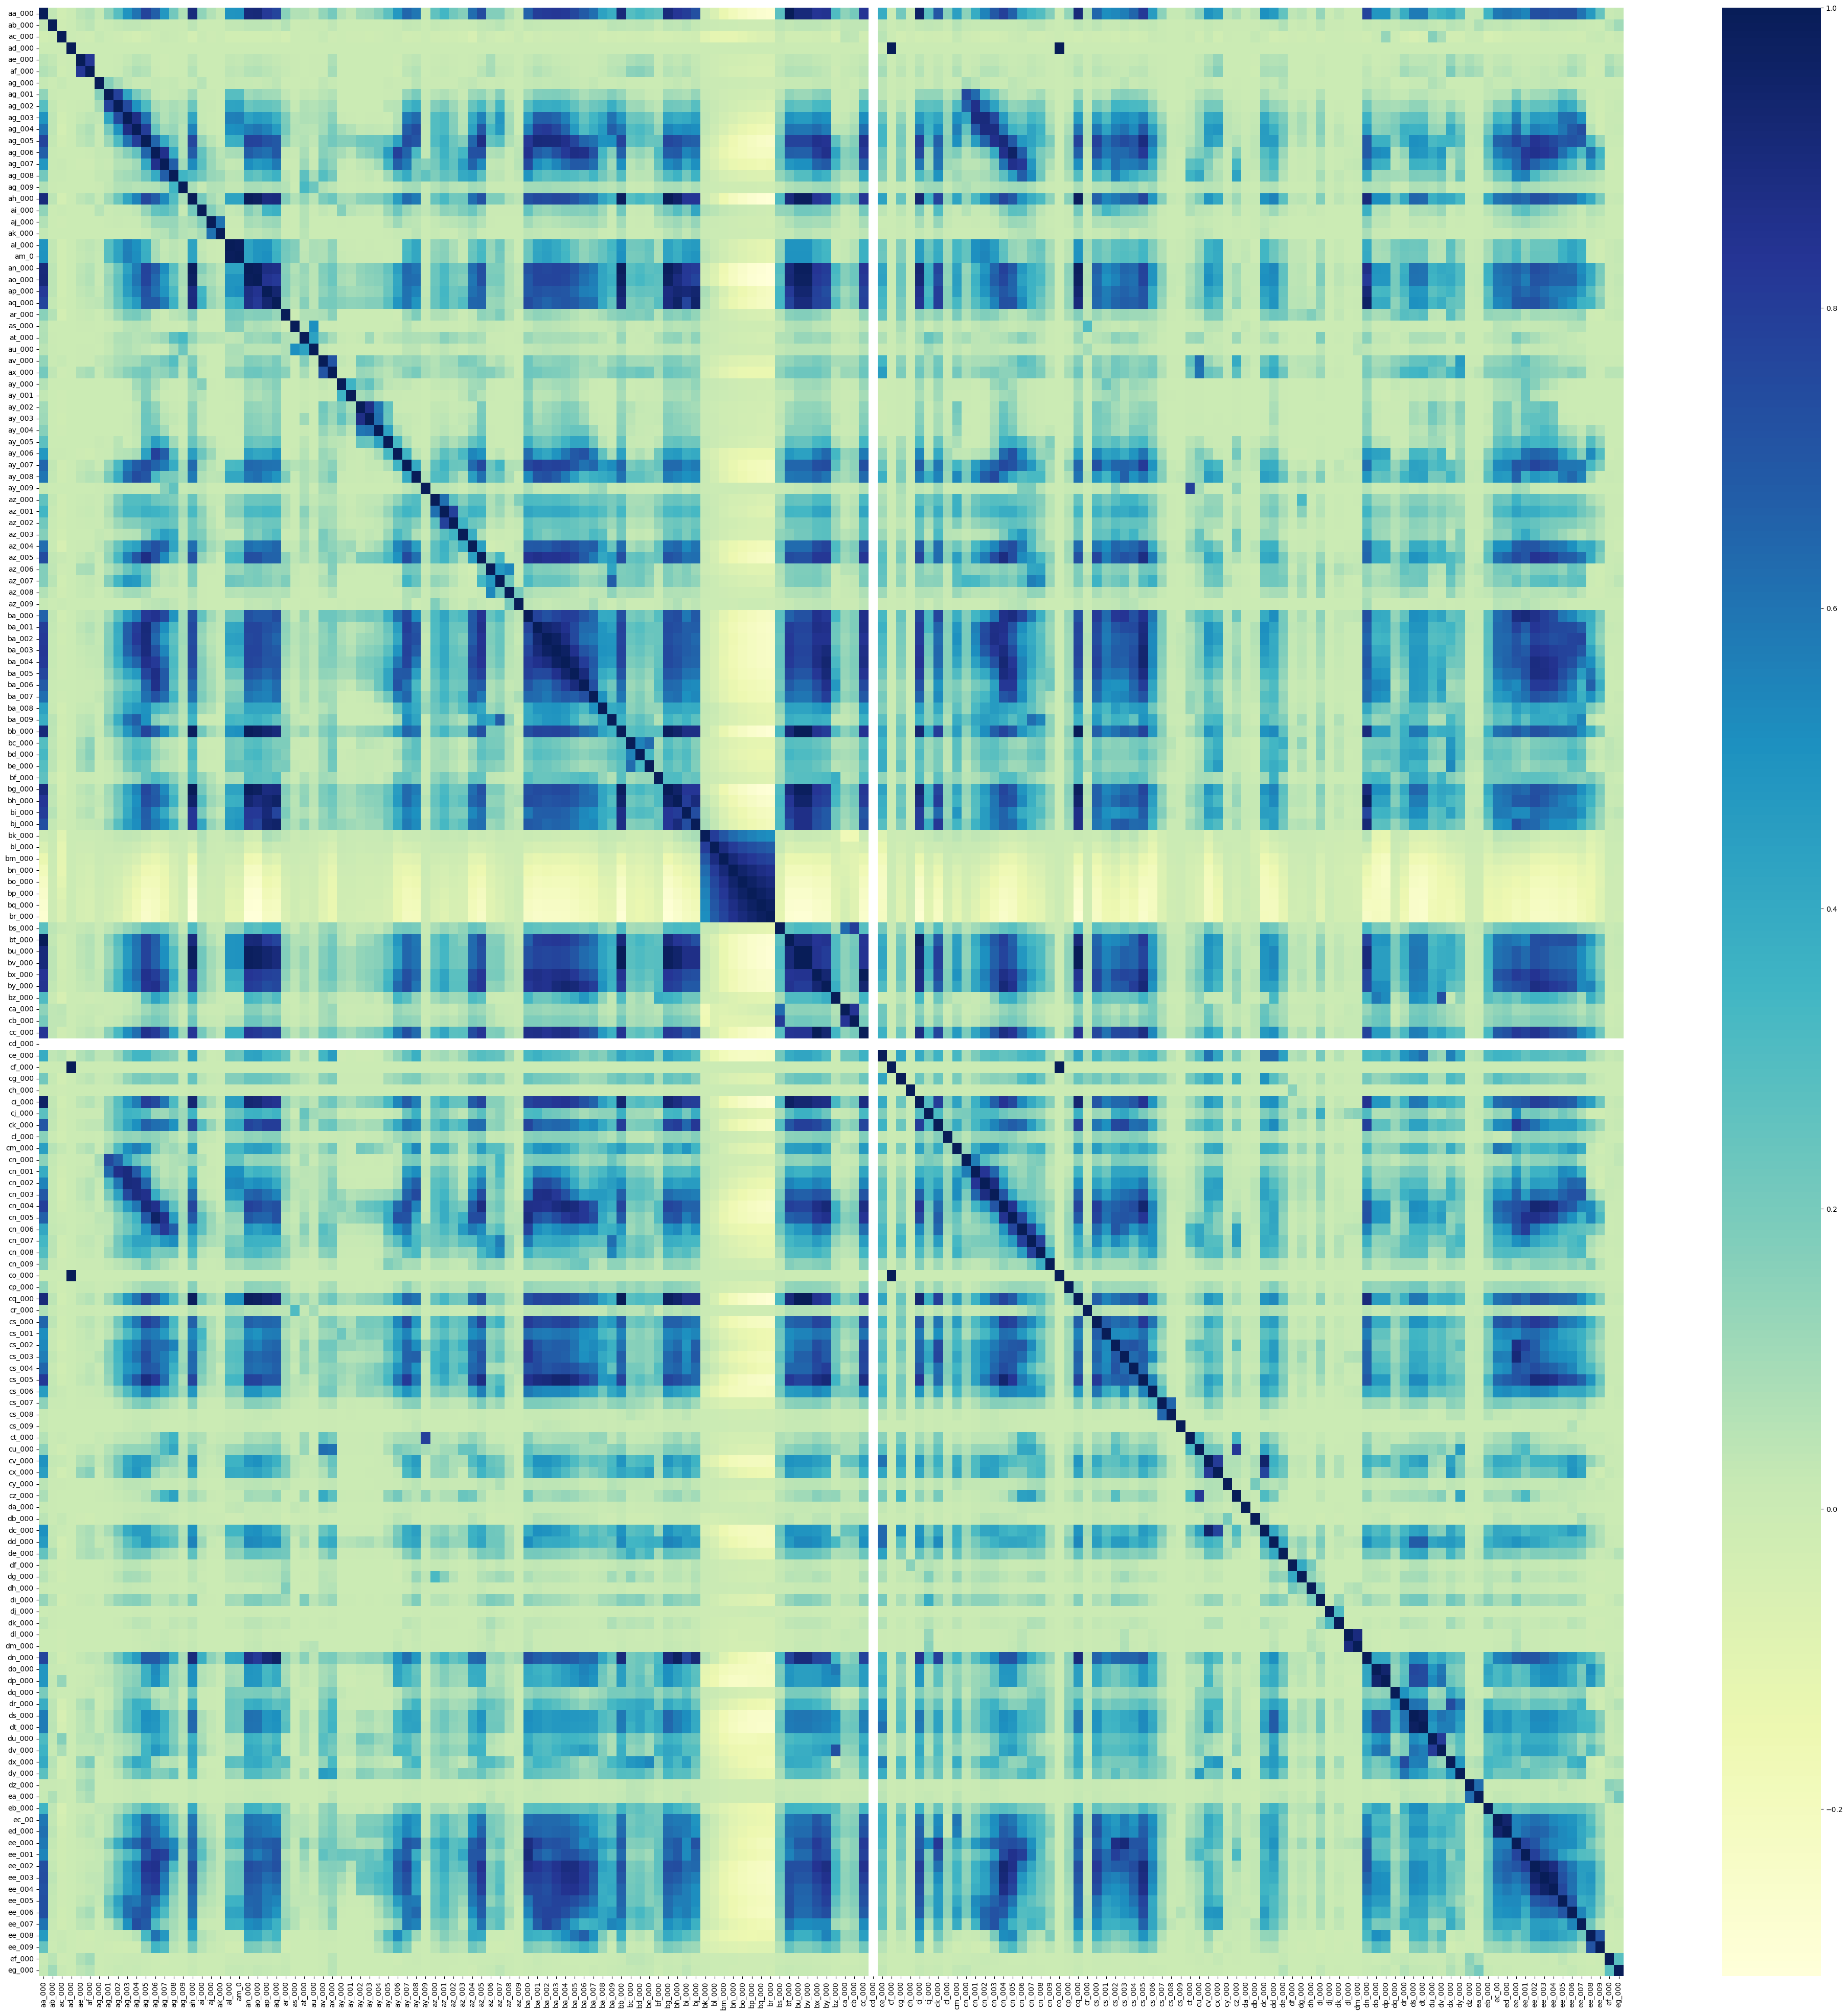

In [27]:
plt.figure(figsize=(50, 50))  # Create a new figure with a large size for the heatmap
corr = imputed_aps_train_df_x.corr()  # Calculate the correlation matrix for the DataFrame
sns.heatmap(corr, cmap="YlGnBu")  # Create a heatmap of the correlation matrix 
plt.show()  

#### iv. Pick $\lfloor\sqrt{170}\rfloor$ features with highest $CV$, and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [28]:
features_to_select = int(np.sqrt(170))  # Calculate the square root of 170 and convert it to an integer
highest_cv_features = cv_dataframe_sorted[:features_to_select]  # Select the top 'features_to_select' features with the highest CV
highest_cv_features  # Display the selected features


cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
dj_000    109.647285
ag_000     91.878565
as_000     86.416904
ay_009     83.786063
az_009     76.967978
ak_000     74.526688
au_000     68.160554
ch_000     58.268229
Name: CV, dtype: float64

In [29]:
def compute_pairplot(df, top_cv_features):
    sns.pairplot(df[top_cv_features.index], diag_kind=None)  # Create a pair plot for selected features
    plt.show()  # Display the pair plot

def plot_box_plots(df):
    fig, axes = plt.subplots(figsize=(12, 7))  # Create a subplot for box plots
    box = sns.boxplot(data=df, ax=axes, orient='h')  # Create horizontal box plots for the DataFrame
    box.set(xscale="log")  # Set the x-axis scale to logarithmic
    plt.plot()  # Display the box plots


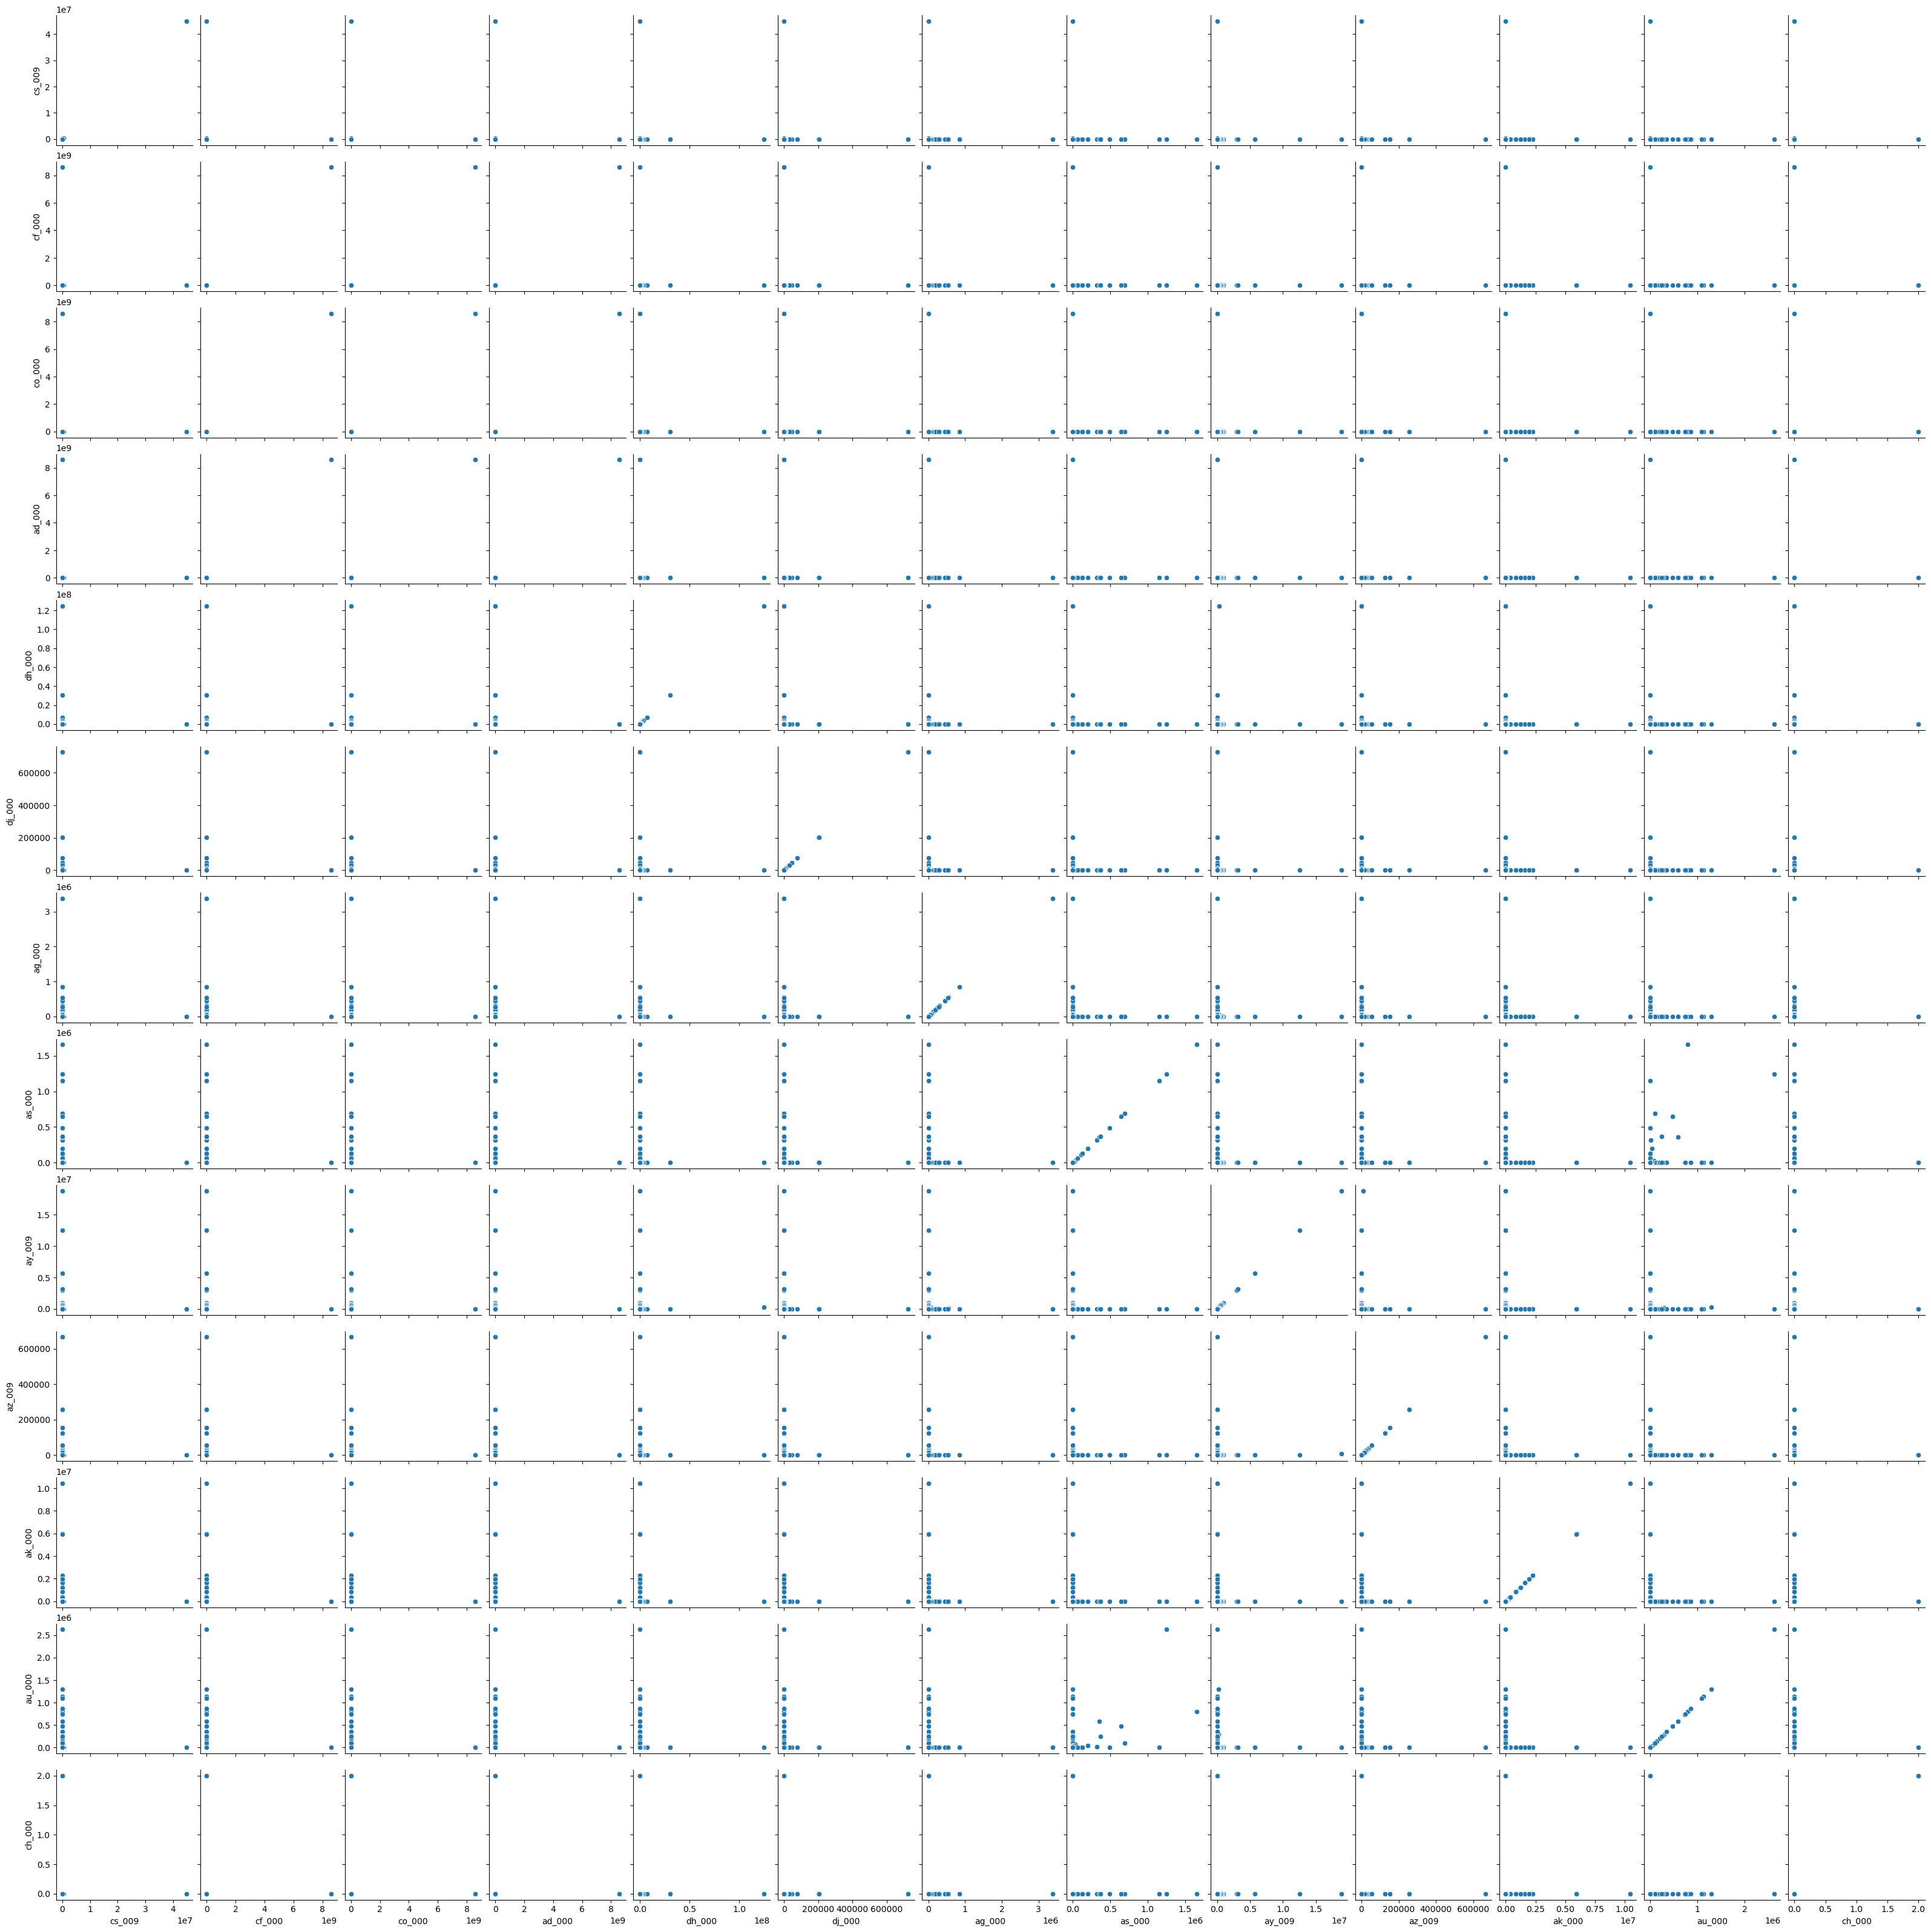

In [30]:
compute_pairplot(imputed_aps_train_df_x, highest_cv_features)

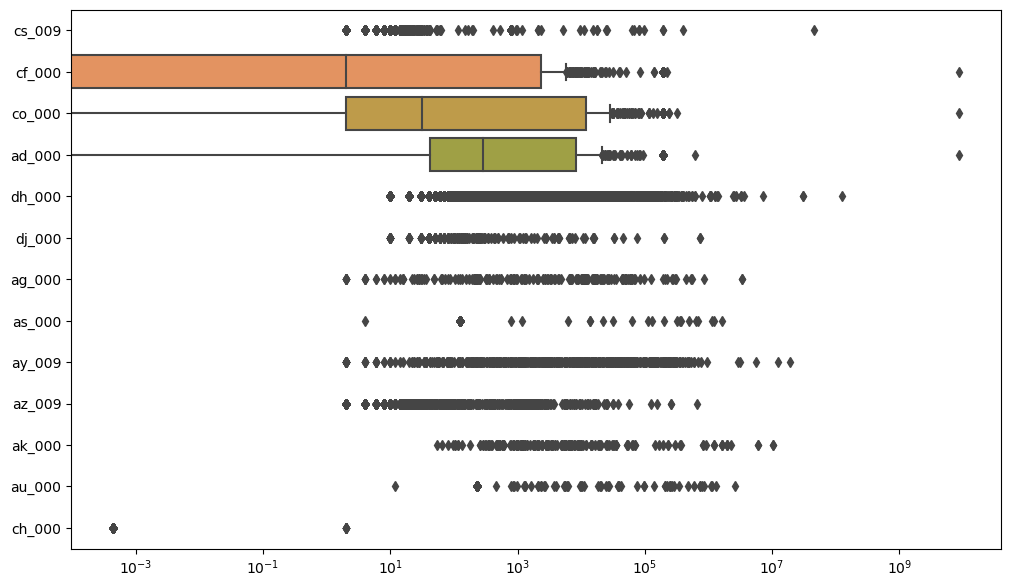

In [31]:
plot_box_plots(imputed_aps_train_df_x[highest_cv_features.index.to_list()])

**Observations:**
> The scatterplots exhibit a high degree of dispersion, making it challenging to draw any meaningful conclusions from them independently. Moreover, since the imputation method employed is based on the mean, the presence of outliers can significantly influence the resulting data points.

#### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [32]:
APS_train_df_y.value_counts()

class
neg      59000
pos       1000
dtype: int64

In [33]:
APS_test_df_y.value_counts()

class
neg      15625
pos        375
dtype: int64

By looking at the train/test data, we can see that the percetage of positive class is just 1000//60000= 1.667. Hence the data is imbalanced.

#### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

The Out-of-Bag (OOB) error estimate is a method used in ensemble machine learning algorithms, particularly in bagging methods like Random Forest. It's a way to estimate the performance of a model without the need for a separate validation set or cross-validation. 

In [34]:
# Calculate and print the confusion matrix
def calculate_confusion_matrix(ground_truth, predicted_truth):
    conf_matrix = confusion_matrix(ground_truth, predicted_truth)
    print(f'Confusion Matrix is: \n{conf_matrix}')
    print("\n")
    
# Calculate and print the accuracy score   
def calculate_accuracy_score(ground_truth, predicted_truth):
    calculated_accuracy_score = accuracy_score(ground_truth, predicted_truth)
    print(f'Accuracy Score is: {round(calculated_accuracy_score, 4)}')
    print(f'Error: {round(1 - calculated_accuracy_score, 5)}')
    print("\n")
    
# Calculate and print the ROC AUC score   
def get_roc_auc_score(ground_truth, predicted_truth):
    calculated_roc_auc_score = roc_auc_score(ground_truth, predicted_truth)
    print(f'ROC AUC Score is: {round(calculated_roc_auc_score, 4)}')
    print("\n")
    
# utility method to plot the ROC curve and AUC
def plot_roc_curve(actualY, predictedY_prob, title, is_for_xgboost=False):
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title(f"ROC curves for {title}")
    y_predicted = predictedY_prob[:, 1]
    if not is_for_xgboost:
        fpr, tpr, thresholds = roc_curve(actualY, y_predicted, pos_label='pos')
    else:
        fpr, tpr, thresholds = roc_curve(actualY, y_predicted)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"ROC Curve Area: {round(roc_auc, 4)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()
    
# Fit a Random Forest model with the option to balance class weights
def fit_random_forest(data_x, data_y, is_balanced=False):
    if not is_balanced:
        RF_model = RandomForestClassifier(max_depth=5, 
                                          random_state=60000,
                                          oob_score=True)
    else:
        RF_model = RandomForestClassifier(max_depth=5, 
                                          random_state=60000,
                                          class_weight='balanced',
                                          oob_score=True)
    RF_model.fit(data_x, data_y)
    return RF_model

# Calculate and print a summary of model performance, including accuracy, confusion matrix, and ROC curve
def calculate_model_summary(ground_truth, predicted_truth, prob, title, is_for_xgboost=False):
    calculate_accuracy_score(ground_truth, predicted_truth)
    calculate_confusion_matrix(ground_truth, predicted_truth)
    if is_for_xgboost:
        get_roc_auc_score(ground_truth, predicted_truth)
    plot_roc_curve(ground_truth, prob, title, is_for_xgboost)
    


Printing Analysis for Training Data

Accuracy Score is: 0.992
Error: 0.00797


Confusion Matrix is: 
[[58972    28]
 [  450   550]]




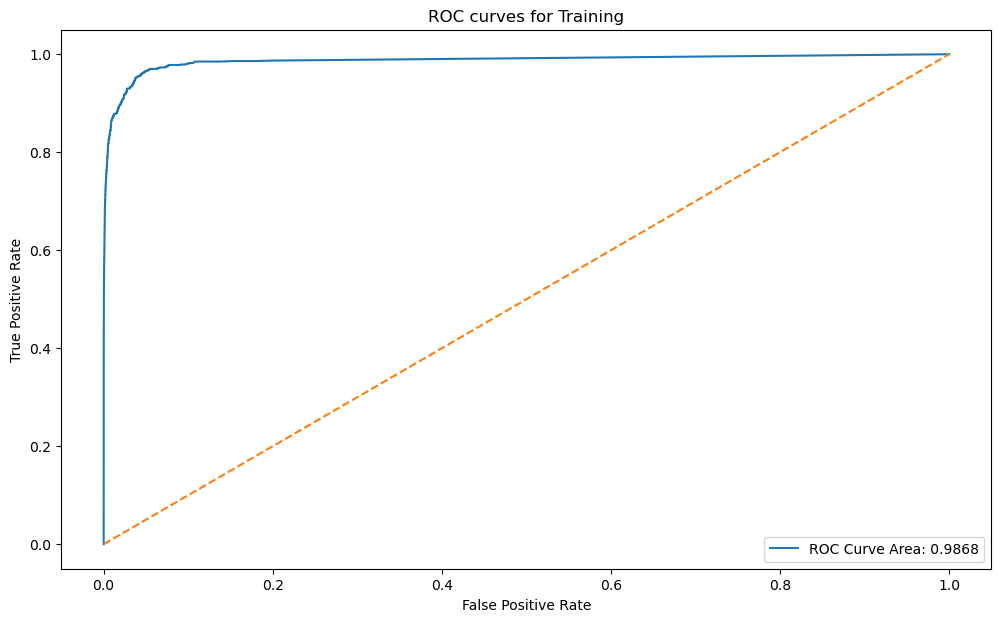

In [35]:
# build random forest model, imbalanced
print("Printing Analysis for Training Data\n")
RF_model = fit_random_forest(imputed_aps_train_df_x, APS_train_df_y)
APS_train_y_predicted = RF_model.predict(imputed_aps_train_df_x)
APS_train_y_prob = RF_model.predict_proba(imputed_aps_train_df_x)
calculate_model_summary(APS_train_df_y, APS_train_y_predicted, APS_train_y_prob, "Training")


Printing Analysis for Testing Data

Accuracy Score is: 0.9879
Error: 0.01206


Confusion Matrix is: 
[[15612    13]
 [  180   195]]




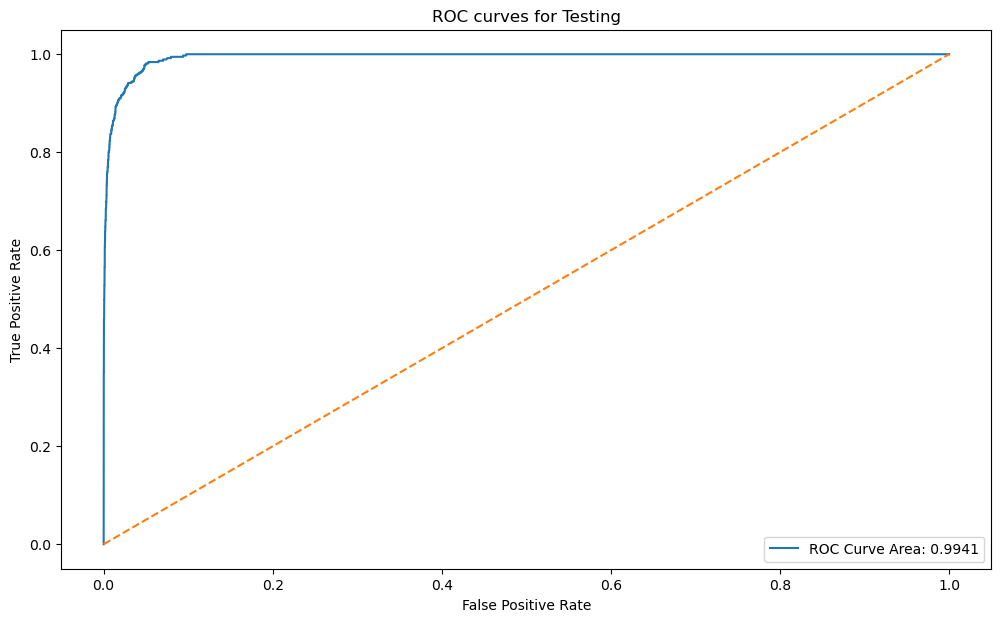

In [36]:
print("Printing Analysis for Testing Data\n")
APS_test_y_predicted = RF_model.predict(imputed_aps_test_df_x)
APS_test_y_prob = RF_model.predict_proba(imputed_aps_test_df_x)
calculate_model_summary(APS_test_df_y, APS_test_y_predicted, APS_test_y_prob, "Testing")

In [37]:
# calculating oob error
train_oob_error = 1 - RF_model.oob_score_
test_error = 1 - accuracy_score(APS_test_df_y, APS_test_y_predicted)

print("Train OOB Error: ", round(train_oob_error, 4))
print("Testing Error: ", round(test_error, 4))

Train OOB Error:  0.0094
Testing Error:  0.0121


> - The Train OOB Error is 0.0094, indicating that the model performs well on the training data, with a low error rate. This suggests that the model generalizes well to the training data, which is a positive sign.
> - The Testing Error is 0.0121, suggesting that the model's performance on the testing data is slightly worse than its performance on the training data but still relatively low. This indicates that the model is likely to perform well on new, unseen data.



#### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

> **Observation:**

>There are two primary methods to address class imbalance in machine learning:  
>- **RandomForestClassifier with class_weight='balanced':** This approach involves using the RandomForestClassifier with the class_weight parameter set to 'balanced.' When this option is selected, the classifier automatically assigns weights to each class in the form of a dictionary {class_label: weight}. These weights are calculated to counteract class imbalance in the training data. If the class_weight parameter is not explicitly specified, all classes are assumed to have a weight of one. For multi-output problems, you can provide a list of dictionaries corresponding to the columns of the output.    
>- **BalancedRandomForestClassifier:** The BalancedRandomForestClassifier is specifically designed to tackle class imbalance. This classifier is an extension of the traditional random forest model. It addresses class imbalance by randomly undersampling each bootstrap sample during training. This under-sampling process helps balance the representation of minority and majority classes, reducing the impact of class imbalance on the model's performance.  

Printing Analysis for Training Data

Accuracy Score is: 0.9589
Error: 0.04113


Confusion Matrix is: 
[[56563  2437]
 [   31   969]]




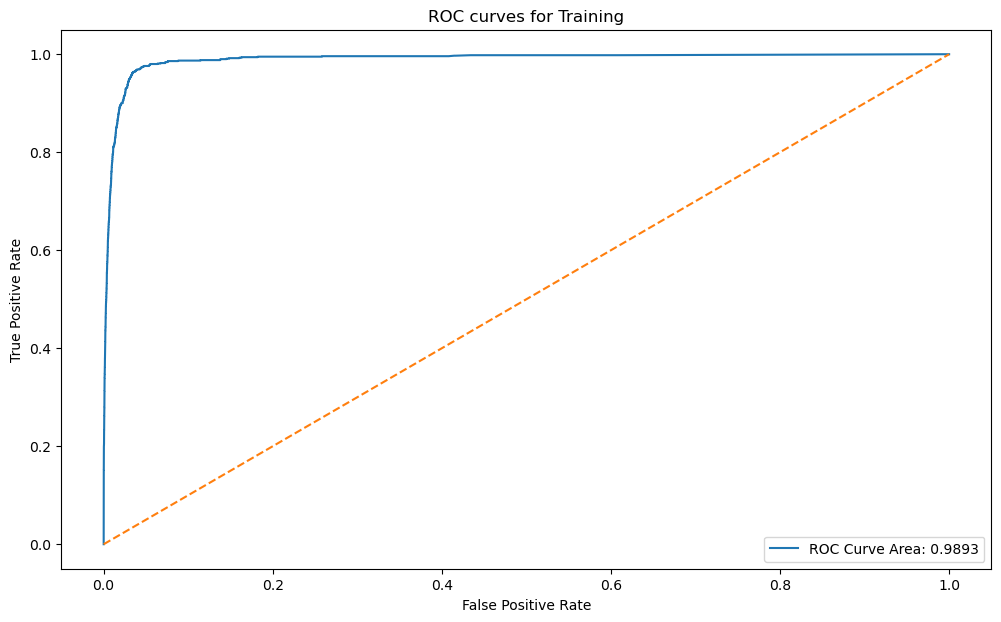

In [38]:
# build random forest model, imbalanced
print("Printing Analysis for Training Data\n")
RF_model = fit_random_forest(imputed_aps_train_df_x, APS_train_df_y, is_balanced=True)
APS_train_y_predicted = RF_model.predict(imputed_aps_train_df_x)
APS_train_y_prob = RF_model.predict_proba(imputed_aps_train_df_x)
calculate_model_summary(APS_train_df_y, APS_train_y_predicted, APS_train_y_prob, "Training")


Printing Analysis for Testing Data

Accuracy Score is: 0.9595
Error: 0.0405


Confusion Matrix is: 
[[14992   633]
 [   15   360]]




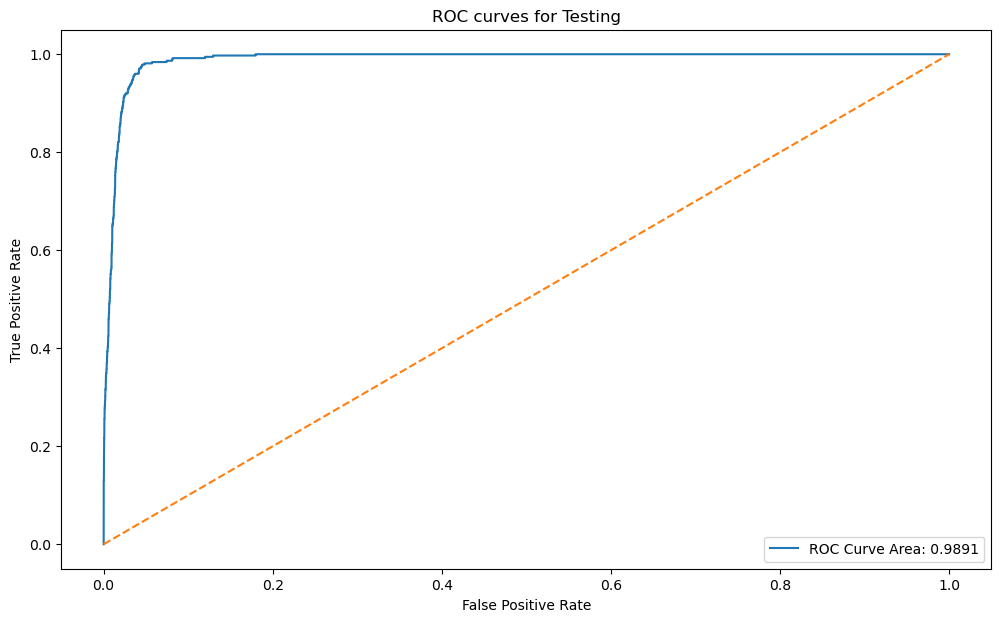

In [39]:
print("Printing Analysis for Testing Data\n")
APS_test_y_predicted = RF_model.predict(imputed_aps_test_df_x)
APS_test_y_prob = RF_model.predict_proba(imputed_aps_test_df_x)
calculate_model_summary(APS_test_df_y, APS_test_y_predicted, APS_test_y_prob, "Testing")

In [40]:
# calculating oob error
train_oob_error = 1 - RF_model.oob_score_
test_error = 1 - accuracy_score(APS_test_df_y, APS_test_y_predicted)

print("Train OOB Error: ", round(train_oob_error, 4))
print("Testing Error: ", round(test_error, 4))

Train OOB Error:  0.0424
Testing Error:  0.0405


> **Observation:**  
-The dataset has an imbalance issue, which means that there is a possibility that the model might tend to predict samples as "negative" (or 'neg') more frequently to achieve a higher overall accuracy. This could explain why we observe better overall performance when there's no class weight compensation applied.  
-Looking at the confusion matrix, when the class weights are balanced, the model's performance in predicting the positive class 'pos' significantly improves. To put this into perspective, the model's prediction for the 'pos' class increases from 195 out of 375 cases to 360 out of 375 cases, based on the data collected from the confusion matrices.

#### (e) XGBoost and Model Trees
#### In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has Pj βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
#### One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [41]:
# Initialize a StandardScaler to standardize the data
ss = StandardScaler()

# Extract the column names for training and testing data
train_x_cols = imputed_aps_train_df_x.columns
test_x_cols = imputed_aps_test_df_x.columns

# Standardize the training data using the StandardScaler
x_train = pd.DataFrame(ss.fit_transform(imputed_aps_train_df_x), columns=train_x_cols)

# Standardize the testing data using the StandardScaler
x_test = pd.DataFrame(ss.fit_transform(imputed_aps_test_df_x), columns=test_x_cols)

# Initialize an XGBoost classifier with specific hyperparameters
estimator = XGBClassifier(
    objective='binary:logistic',  # Binary classification objective
    colsample_bytree=0.3,        # Fraction of features used in each boosting round
    learning_rate=0.1,           # Step size shrinkage to prevent overfitting
    max_depth=5,                 # Maximum depth of the decision tree
    use_label_encoder=False      # Disable label encoding for compatibility
)

# Define a grid of hyperparameters to search for the best 'reg_alpha'
param_grid = {
    "reg_alpha": [0.01, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200]
}

# Map the class labels to numeric values in the testing dataset
APS_test_df_y['class'].replace({'neg': 0, 'pos': 1}, inplace=True)

APS_train_df_y

class
0       neg
1       neg
2       neg
3       neg
4       neg
...     ...
59995   neg
59996   neg
59997   neg
59998   neg
59999   neg

[60000 rows x 1 columns]

In [42]:
# Initialize a K-Fold cross-validation object with 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=11)

# Initialize a GridSearchCV object to perform hyperparameter tuning
grid_cv = GridSearchCV(
    estimator,         # The estimator (XGBoost classifier)
    param_grid,        # The grid of hyperparameters to search
    n_jobs=-1,         # Use all available CPU cores for parallel computation
    cv=cv,             # Cross-validation strategy (5-fold)
    scoring="accuracy" # Scoring metric for evaluation
)

# Map the class labels to numeric values in the training dataset
APS_train_df_y['class'].replace({'neg': 0, 'pos': 1}, inplace=True)

# Fit the GridSearchCV object to the standardized training data
grid_cv.fit(x_train, APS_train_df_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'reg_alpha': [0.01, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2,
                                       0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50,
                                       100, 200]},
             scoring='accuracy')

In [43]:
print('The best alpha is ',grid_cv.best_params_, ' with a cross validation accuracy of ',round(grid_cv.best_score_,4))

The best alpha is  {'reg_alpha': 0.07}  with a cross validation accuracy of  0.9941


In [44]:
# Extract the best alpha value from the hyperparameter tuning results
alpha_to_use = grid_cv.best_params_['reg_alpha']

# Initialize a new XGBoost classifier with the best alpha and other fixed hyperparameters
estimator = XGBClassifier(
    objective='binary:logistic',  # Objective for binary classification
    reg_alpha=alpha_to_use,       # Set the best alpha value
    colsample_bytree=0.3,        # Fraction of features used in each tree
    learning_rate=0.1,           # Learning rate for boosting
    max_depth=5,                 # Maximum tree depth
    use_label_encoder=False      # Disable label encoding (deprecated)
)

# Fit the XGBoost classifier with the selected hyperparameters to the standardized training data
estimator.fit(x_train, APS_train_df_y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_train_pred = estimator.predict(x_train)
y_train_pred_prob = estimator.predict_proba(x_train)

y_test_pred = estimator.predict(x_test)
y_test_pred_prob = estimator.predict_proba(x_test)


Printing Analysis for Training Data

Accuracy Score is: 0.9984
Error: 0.00162


Confusion Matrix is: 
[[58995     5]
 [   92   908]]


ROC AUC Score is: 0.954




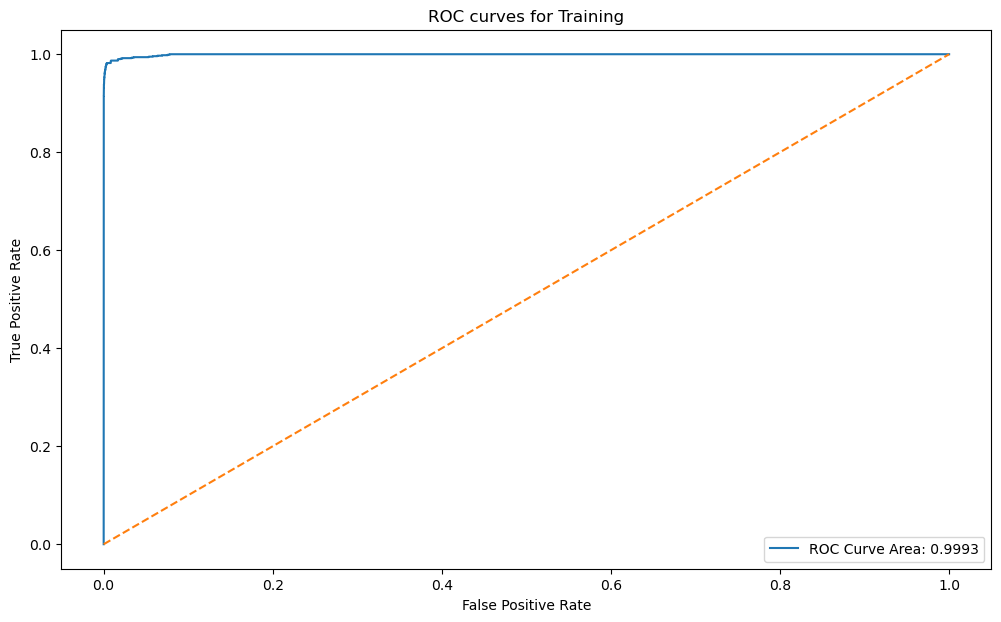

In [46]:
print("Printing Analysis for Training Data\n")
calculate_model_summary(APS_train_df_y.values, y_train_pred, y_train_pred_prob, "Training", is_for_xgboost=True)

Printing Analysis for Testing Data

Accuracy Score is: 0.9921
Error: 0.00787


Confusion Matrix is: 
[[15600    25]
 [  101   274]]


ROC AUC Score is: 0.8645




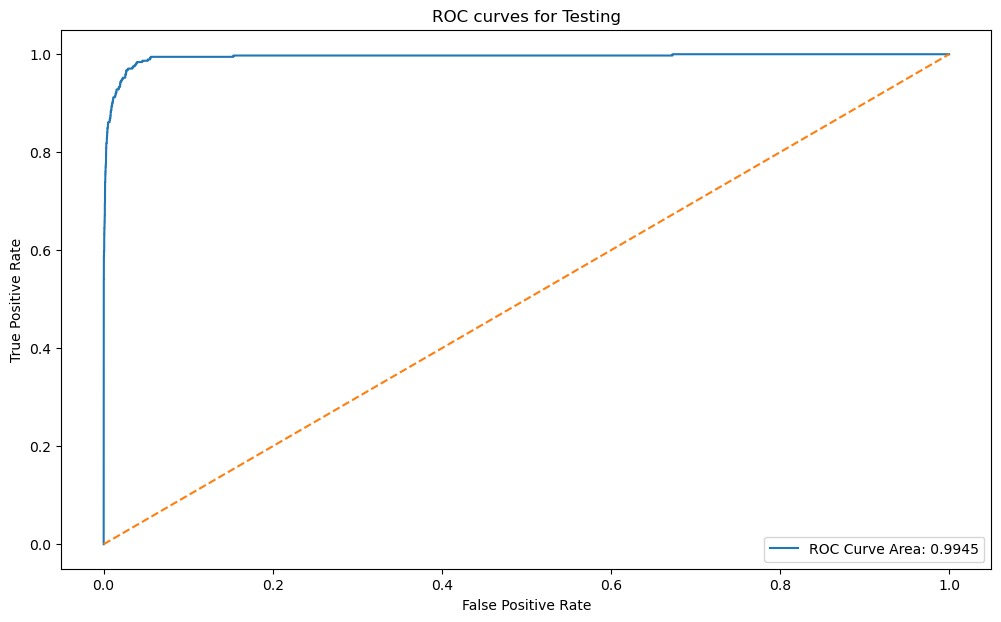

In [47]:
print("Printing Analysis for Testing Data\n")
calculate_model_summary(APS_test_df_y, y_test_pred, y_test_pred_prob, "Testing", is_for_xgboost=True)


#### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.4 Train XGBosst with L1-penalized lo- gistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.


In [48]:
y_train = APS_train_df_y
y_test =APS_test_df_y
y_train

class
0          0
1          0
2          0
3          0
4          0
...      ...
59995      0
59996      0
59997      0
59998      0
59999      0

[60000 rows x 1 columns]

In [49]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
estimator

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
data = {
    "Before SMOTE": y_train.value_counts(),
    "After SMOTE": y_train_smote.value_counts()
}

df = pd.DataFrame(data=data)
df

Before SMOTE  After SMOTE
class                           
0             59000        59000
1              1000        59000

In [51]:
cv = KFold(n_splits=5,shuffle=True,random_state=11)
grid_smote = GridSearchCV(estimator, 
                       param_grid, 
                       n_jobs=-1, 
                       cv=cv, 
                       scoring="accuracy")
grid_smote.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'reg_alpha': [0.01, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2,
                                       0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50,
                                       100, 200]},
             scoring='accuracy')

In [52]:
print('The best alpha is ',grid_smote.best_params_, ' with a cross validation accuracy of ',round(grid_smote.best_score_,4))

The best alpha is  {'reg_alpha': 0.08}  with a cross validation accuracy of  0.9942


In [53]:
alpha_value = grid_smote.best_params_['reg_alpha']

estimator_smote = XGBClassifier(objective='binary:logistic',
                          reg_alpha=alpha_value,
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5,
                          use_label_encoder=False,)
y_train['class'].replace({'neg':0,'pos':1},inplace=True)
estimator_smote.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
y_train_pred = estimator_smote.predict(x_train)
y_train_pred_prob = estimator_smote.predict_proba(x_train)

y_test_pred = estimator_smote.predict(x_test)
y_test_pred_prob = estimator_smote.predict_proba(x_test)

Printing Analysis for Training Data

Accuracy Score is: 0.9984
Error: 0.00162


Confusion Matrix is: 
[[58994     6]
 [   91   909]]


ROC AUC Score is: 0.9544




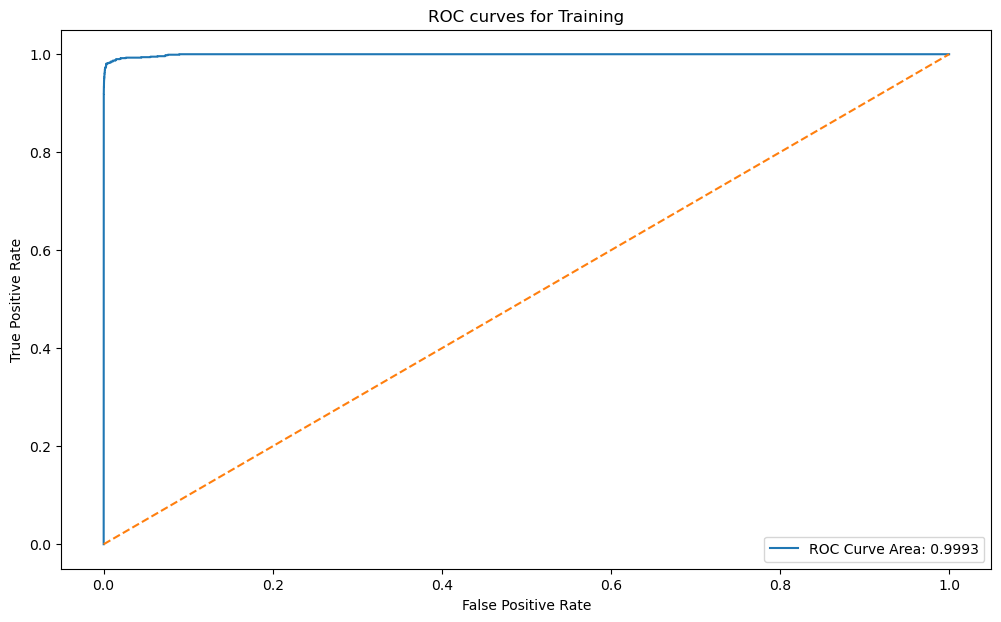

In [55]:
print("Printing Analysis for Training Data\n")
calculate_model_summary(y_train.values, y_train_pred, y_train_pred_prob, "Training", is_for_xgboost=True)

Printing Analysis for Testing Data

Accuracy Score is: 0.9921
Error: 0.00794


Confusion Matrix is: 
[[15600    25]
 [  102   273]]


ROC AUC Score is: 0.8632




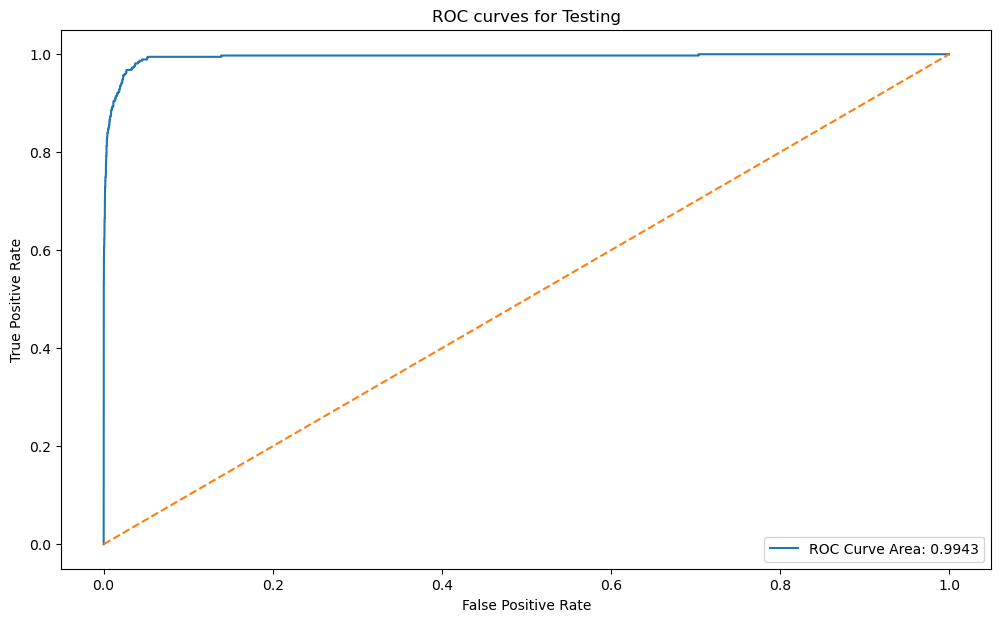

In [56]:
print("Printing Analysis for Testing Data\n")
calculate_model_summary(y_test, y_test_pred, y_test_pred_prob, "Testing", is_for_xgboost=True)

### 2. ISLR 6.6.3
**Suppose we estimate the regression coefficients in a linear regression model by minimizing for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.**  

**(a) As we increase s from 0, the training RSS will:**  
**i. Increase initially, and then eventually start decreasing in an inverted U shape.    
ii. Decrease initially, and then eventually start increasing in a U shape.    
iii. Steadily increase.    
iv. Steadily decrease.    
v. Remain constant.**  

(a) **Steadily Decrease:** As we increase s value from 0 to inf, we are relaxing the constraints on $\beta$s, hence we are going towards overfiting from underfitting. Hence training RSS would steadily decrease. 

(b) **Decrease Initially and then eventually starts increasing in a new shape.** Since we are moving from underfit model to overfit model, testing RSS will first go down and then increase for overfit models. 

(c) **Steadily Increases:** $\beta$ is almost zero in the beginning which would mean that there is almost no variance in the beginning. Hence variance will go up as we move from s = 0 to s = inf. 

(d) **Steadily Decrease:** Since the variance is increasing, the bias will decrease. This is the basics of bias-variance trade-off.

(e) **Irreducible error** is  not in any ML model's control to change. Hence it will remain constant.

### 3. ISLR, 6.6.5
**It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Suppose that $n = 2, p = 2, x_{11} = x_{12}, x_{21} = x_{22}$. Furthermore, suppose that $y1 +y2 = 0$ and $x11 +x21 = 0$ and $x_{12} +x_{22} = 0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\beta_0$ = 0.**  
**a) Write out the ridge regression optimization problem in this setting.**  
**b) Argue that in this setting, the ridge coefficient estimates satisfy $β_1 = β_2$.**  
**c) Write out the lasso optimization problem in this setting.**  
**d) Argue that in this setting, the lasso coefficients $β_1$ and $β_2$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.**  

### Part (a)

For ridge regression, we have

$
X =
  \begin{bmatrix}
    x_{11} x_{12} \\
    x_{21} x_{22}
  \end{bmatrix}
$

After equiting $x_{11} = x_{12} $ and $x_{21} == x_{22}$, we have,

$
X =
  \begin{bmatrix}
    x_{11} x_{11} \\
    x_{22} x_{22}
  \end{bmatrix}
$

For ridge coeeficient estimates, all values that minimizing, 

$\sum_{1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p}\beta_jx_{ij})^2 + \lambda \sum_{j=1}^{p}\beta_j^2$

Since key for ridge regression is to select $\lambda$ such that $\beta_2$ is minimized, 

$\sum_{1}^{2} (y_i - \beta_0 - \sum_{j=1}^{2}\beta_jx_{ij})^2 + \lambda \sum_{j=1}^{2}\beta_j^2$

$(y_1 - \beta_0 - \beta_1x_{11} - \beta_2x_{12})^2 + (y_2 - \beta_0 - \beta_1x_{21} - \beta_2x_{22})^2 + \lambda(\beta_1^2 + \beta_2^2)$, 

Given that $x_{11} = x_{12} $ and $x_{21} = x_{22}$ and $\hat{\beta_0}$ = 0, 

Final problem in this settings would be,

$(y_1 - x_{11} ( \hat{\beta_1} + \hat{\beta_2}))^2 + (y_2 - x_{22}( \hat{\beta_1} + \hat{\beta_2}))^2 + \lambda(\hat{\beta_1}^2 + \hat{\beta_2}^2)$

### Part (b)

Let $f(\hat{\beta_1}, \hat{\beta_2}) = (y_1 - x_{11} ( \hat{\beta_1} + \hat{\beta_2}))^2 + (y_2 - x_{22}( \hat{\beta_1} + \hat{\beta_2}))^2 + \lambda(\hat{\beta_1}^2 + \hat{\beta_2}^2)$

Since $x_{11} = x_{22} $, 

Let $f(\hat{\beta_1}, \hat{\beta_2}) = 2(y_1 - x_{11} ( \hat{\beta_1} + \hat{\beta_2}))^2 + \lambda(\hat{\beta_1}^2 + \hat{\beta_2}^2)$

Minimizing the equation be taking partial derivation, 

$\frac{{\partial f}}{{\partial \hat{\beta}}} = 4\beta_1x_{11}^2 - 4y_1x_{11} + 4x_{11}^2\beta_2^2 + 2\lambda\hat{\beta_1} = 0$

$\hat{\beta_1}[4x_{11}^2 + 2\lambda] - 4y_1x_{11} + 4x_{11}^2\hat{\beta_2} = 0$

$\hat{\beta_1}[2x_{11}^2 + \lambda] - 2y_1x_{11} + 2x_{11}^2\hat{\beta_2} = 0$

Hence, 

$\hat{\beta_1} = \frac{2y_1x_{11} - 2x_{11}^2\hat{\beta_2}}{\lambda + 2x_{11}^2}$

$\hat{\beta_2} = \frac{2y_1x_{11} - 2x_{11}^2\hat{\beta_1}}{\lambda + 2x_{11}^2}$

By eliminating the terms in two equations, we can obtain that:
$\hat{\beta_1} = \hat{\beta_2}$

### Part (c)

Substituting the $\beta s$ in the same equation as (a),

$2(y_1 - \hat{\beta_1}x_{11} - \hat{\beta_2}x_{11})^2 + \lambda(\left|\hat{\beta_1}\right| + \left|{\hat{\beta_2}}\right|)$

### Pard (d)

To minimize the above equation, taking derivate again as shown in part (b), 

$\frac{{\partial f}}{{\partial \hat{\beta}}}$ = 0

$4x_{11}[y_1 - x_{11}(\hat{\beta_1} + \hat{\beta_2})] = \pm \lambda$

The sign of the right hand side depends on the value of the $\beta$. This is the optimization problem in LASSO and can have many more solutions. 

### 4. ISLR 8.4.5
**Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):
0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.  
There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?**

1. **Majority Polling:** When overall probability is greater than 0.5, the classification will be true and else otherwise. Out of 10 samples, 4 samples have probability < 0.5 and 6 samples have probability >= 0.5. Since positive/True class is in majority, classification would be **red**.

2. **Average Probability:** Mean for given probabilities = 0.45 hence the classification would be **green**.

### 5. ISLR 9.7.3
**Here we explore the maximal margin classifier on a toy data set.  
(a) We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is an associated class label. Sketch the observations**

In [57]:
sample_data = pd.DataFrame({'X1': [3, 2, 4, 1, 2, 4, 4], 
                   'X2':[4, 2, 4, 4, 1, 3, 1], 
                   'Y':['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']})

sample_data['Y'].replace({'red': 0, 'blue': 1}, inplace = True)
train_x, train_y = sample_data.drop(['Y'], axis = 1), sample_data['Y']
model = svm.SVC(kernel = 'linear', C = 1000)
model.fit(train_x, train_y)
y_pred = model.predict(train_x)
sample_data

X1  X2  Y
0   3   4  0
1   2   2  0
2   4   4  0
3   1   4  0
4   2   1  1
5   4   3  1
6   4   1  1

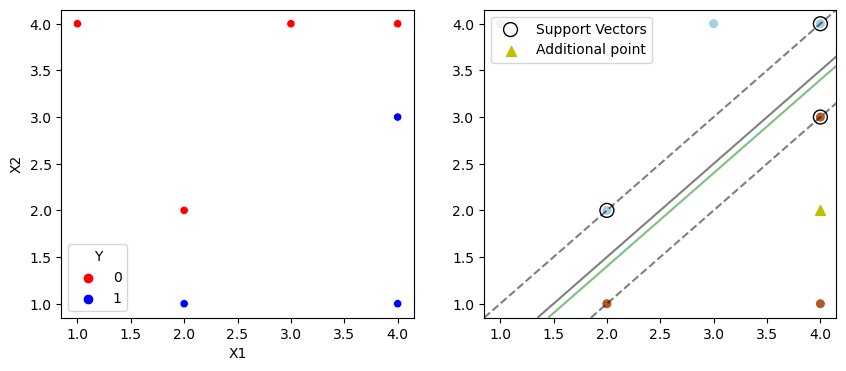

[-1.0004096] [[ 1.9998464 -1.9996928]]


In [58]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(data = sample_data, x = "X1", y = "X2", hue = "Y", palette = ['red', 'blue'], ax = ax[0])

ax[1].scatter(sample_data.iloc[:, 0], sample_data.iloc[:, 1], 
              c = sample_data.iloc[:, -1], s = 30, cmap = plt.cm.Paired)

xlim, ylim = ax[1].get_xlim(), ax[1].get_ylim()
y_axis, x_axis = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(xlim[0], xlim[1], 30))
xy_axis = np.vstack([x_axis.ravel(), y_axis.ravel()]).T
z_axis = model.decision_function(xy_axis).reshape(x_axis.shape)

ax[1].contour(x_axis, y_axis, z_axis, colors = 'k', levels = [-1, 0, 1], alpha = 0.5,
           linestyles=['--', '-', '--'], label = "Decision Boundary")
ax[1].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 100,
           linewidth = 1, facecolors = 'none', edgecolors='k', label = "Support Vectors")
ax[1].contour(x_axis, y_axis, z_axis - 0.2, colors = 'g', levels = [0], alpha = 0.5,
           linestyles=['-'])
ax[1].scatter([4.0], [2.0], color = 'y', marker = '^', s = 50, label = "Additional point")
ax[1].legend(loc='upper left')

plt.show()
print(model.intercept_, model.coef_)

**(a) Visulisation is shown above**

**(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1))**  
Ans: **The solid black** line is a hyperplane  

**(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $\beta_0 + \beta_1x_1 + \beta_2x_2 > 0$, and classify to Blue otherwise.” Provide the values for $\beta_0, \beta_1, and \beta_2$.**    
Ans: The parameters are as follows:   
 $\beta_0 = 1, \beta_1 = -1, \beta_2 = 2$   
$\beta_0 + \beta_1 X_1 + \beta_2 X_2 >= 0$ implies red, otherwise blue

**(d) On your sketch, indicate the margin for the maximal margin hyperplane.**    
 Ans: **The dashed line** indicates the maximal margin.

**(e) Indicate the support vectors for the maximal margin classifier.**    
Ans: Support vectors are shown in **circled form**. 

**(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane**    
Ans: The seventh point is far away from the maximal margin hyperplane. If it is on the edge of the decision boundary, it will have effects, but it does not.

**(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.**    
Ans: **Solid green line** is not an optimal hyperplane. 

**(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane**   
Ans: The new point marked as a yellow triangle which makes it **not linearly separable**.